In [1]:
## Loading necessary libraries 
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [11]:
## Loading data set
# unzipping dataset
import zipfile
with zipfile.ZipFile("../datasets/DataScientist_L2.zip", 'r') as zip_ref:
    zip_ref.extractall("../datasets/")

In [62]:
##Loading dataset
data_path = "../datasets/DataScientist_L2/Ascendeum_Dataset2.csv"
bid_data = pd.read_csv(data_path)

In [3]:
##checking info and summary of data
print(bid_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     567291 non-null  object 
 1   site_id                  567291 non-null  int64  
 2   ad_type_id               567291 non-null  int64  
 3   geo_id                   567291 non-null  int64  
 4   device_category_id       567291 non-null  int64  
 5   advertiser_id            567291 non-null  int64  
 6   order_id                 567291 non-null  int64  
 7   line_item_type_id        567291 non-null  int64  
 8   os_id                    567291 non-null  int64  
 9   integration_type_id      567291 non-null  int64  
 10  monetization_channel_id  567291 non-null  int64  
 11  ad_unit_id               567291 non-null  int64  
 12  total_impressions        567291 non-null  int64  
 13  total_revenue            567291 non-null  float64
 14  view

In [4]:
## Changing d_Type of date column
bid_data.date.head(5)

0    2019-06-30 00:00:00
1    2019-06-30 00:00:00
2    2019-06-30 00:00:00
3    2019-06-30 00:00:00
4    2019-06-30 00:00:00
Name: date, dtype: object

In [63]:
bid_data.date = pd.to_datetime(bid_data.date)
print(bid_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date                     567291 non-null  datetime64[ns]
 1   site_id                  567291 non-null  int64         
 2   ad_type_id               567291 non-null  int64         
 3   geo_id                   567291 non-null  int64         
 4   device_category_id       567291 non-null  int64         
 5   advertiser_id            567291 non-null  int64         
 6   order_id                 567291 non-null  int64         
 7   line_item_type_id        567291 non-null  int64         
 8   os_id                    567291 non-null  int64         
 9   integration_type_id      567291 non-null  int64         
 10  monetization_channel_id  567291 non-null  int64         
 11  ad_unit_id               567291 non-null  int64         
 12  total_impression

In [79]:
bid_data.date.head(5)

0   2019-06-30
1   2019-06-30
2   2019-06-30
3   2019-06-30
4   2019-06-30
Name: date, dtype: datetime64[ns]

In [5]:
bid_data.head(5)

,date,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
0,2019-06-30 00:00:00,351,10,187,2,84,3473,19,60,1,4,5174,16,0.0,2,16,1
1,2019-06-30 00:00:00,351,10,187,2,84,3473,19,58,1,4,5174,6,0.0,0,6,1
2,2019-06-30 00:00:00,351,10,147,2,84,3473,19,60,1,4,5174,4,0.0,0,4,1
3,2019-06-30 00:00:00,351,10,147,2,84,3473,19,58,1,4,5174,4,0.0,0,4,1
4,2019-06-30 00:00:00,348,10,147,3,79,3463,20,59,1,19,5138,4,0.0,0,4,1


In [6]:
bid_data.describe()

,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
count,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.0,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.0
mean,347.107775,10.220578,110.226133,1.899669,262.084295,1951.273747,12.632081,57.217194,1.0,14.433716,5136.436645,33.673674,0.069740,12.838251,32.152818,1.0
std,2.930371,1.222863,66.177820,0.791982,627.325490,1652.545702,6.812571,1.956012,0.0,7.135874,62.508575,220.865448,0.713603,101.989184,207.096504,0.0
min,342.000000,10.000000,1.000000,1.000000,8.000000,45.000000,3.000000,15.000000,1.0,1.000000,5050.000000,0.000000,-0.154200,0.000000,0.000000,1.0
25%,345.000000,10.000000,39.000000,1.000000,79.000000,45.000000,4.000000,56.000000,1.0,4.000000,5099.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,346.000000,10.000000,122.000000,2.000000,88.000000,3438.000000,11.000000,57.000000,1.0,19.000000,5127.000000,2.000000,0.000000,0.000000,2.000000,1.0
75%,350.000000,10.000000,183.000000,3.000000,139.000000,3460.000000,19.000000,58.000000,1.0,19.000000,5168.000000,6.000000,0.005400,2.000000,6.000000,1.0
max,351.000000,17.000000,308.000000,5.000000,2646.000000,3489.000000,20.000000,60.000000,1.0,21.000000,5443.000000,14452.000000,83.822000,7392.000000,13756.000000,1.0


- **No missing data in dataset**
- **All values integers/float**

##### Analysing the distribution of different variables

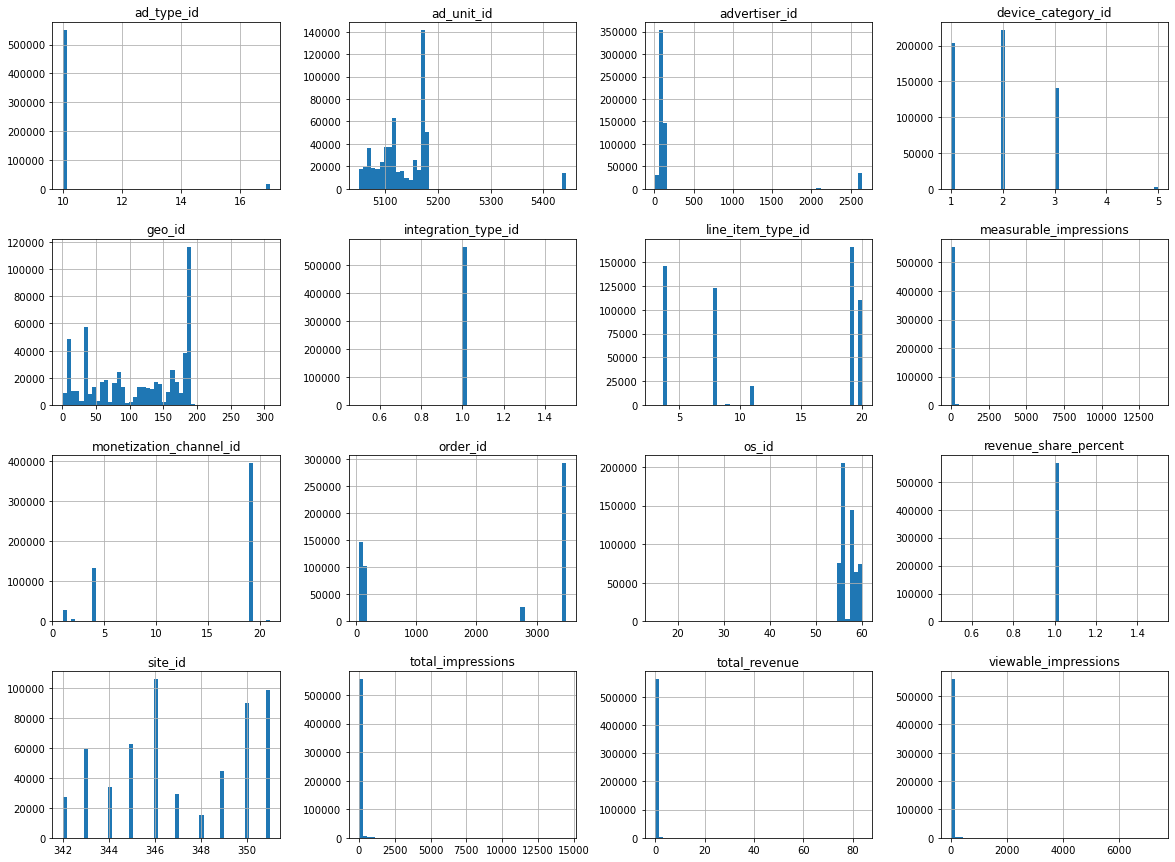

In [7]:
%matplotlib inline
bid_data.hist(bins=50, figsize = (20,15))
plt.show()

In [82]:
cols = bid_data.columns

In [83]:
## Analyzing levels of data
for i in range(1,len(cols)):
    print(cols[i])
    print(bid_data[cols[i]].value_counts())
    #print(bid_data.cols[i].value_counts())

site_id
346    105889
351     98499
350     89995
345     62520
343     59619
349     44773
344     33939
347     29470
342     27292
348     15295
Name: site_id, dtype: int64
ad_type_id
10    549415
17     17876
Name: ad_type_id, dtype: int64
geo_id
187    113653
33      49040
11      39201
183     33695
66      13301
        ...  
198         3
153         3
225         1
203         1
196         1
Name: geo_id, Length: 219, dtype: int64
device_category_id
2    221405
1    203381
3    140432
5      1886
4       187
Name: device_category_id, dtype: int64
advertiser_id
79      230469
139     146034
88       51150
97       26428
90       20363
96       20126
16       19569
2634     11261
8        10857
2636      5144
84        4358
2644      4327
2646      2943
2645      2893
2089      2780
2639      2486
2637      2471
2641      1045
2643       922
2640       876
2642       378
2638       323
2635        88
Name: advertiser_id, dtype: int64
order_id
45      146034
147      41580
3460 

### Dropping variables

- Some variables like integration_type_id and revenue_share_percent have 0 variances, these variables do not add any information to prediction hence have no significance in terms of modelling
- order_id: unique mappign id 

**Other Insignificant variables**

 - as per PS, line item type id has to be ignored, I will use it to stratify the dataset and later remove so that we do not miss information based on skewed dataset
 - Ad_type_id also has a skewed distribution, will be used to stratify dataset during modelling, not used directly in modelling

In [174]:
##Creating a shallow copy of orignal dataset
data_clean = bid_data.copy()

In [175]:
##dropping columns
cols_drop = ['integration_type_id','revenue_share_percent','order_id']
data_clean.drop(cols_drop,axis = 1,inplace = True)

In [123]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date                     567291 non-null  datetime64[ns]
 1   site_id                  567291 non-null  int64         
 2   ad_type_id               567291 non-null  int64         
 3   geo_id                   567291 non-null  int64         
 4   device_category_id       567291 non-null  int64         
 5   advertiser_id            567291 non-null  int64         
 6   line_item_type_id        567291 non-null  int64         
 7   os_id                    567291 non-null  int64         
 8   monetization_channel_id  567291 non-null  int64         
 9   ad_unit_id               567291 non-null  int64         
 10  total_impressions        567291 non-null  int64         
 11  total_revenue            567291 non-null  float64       
 12  viewable_impress

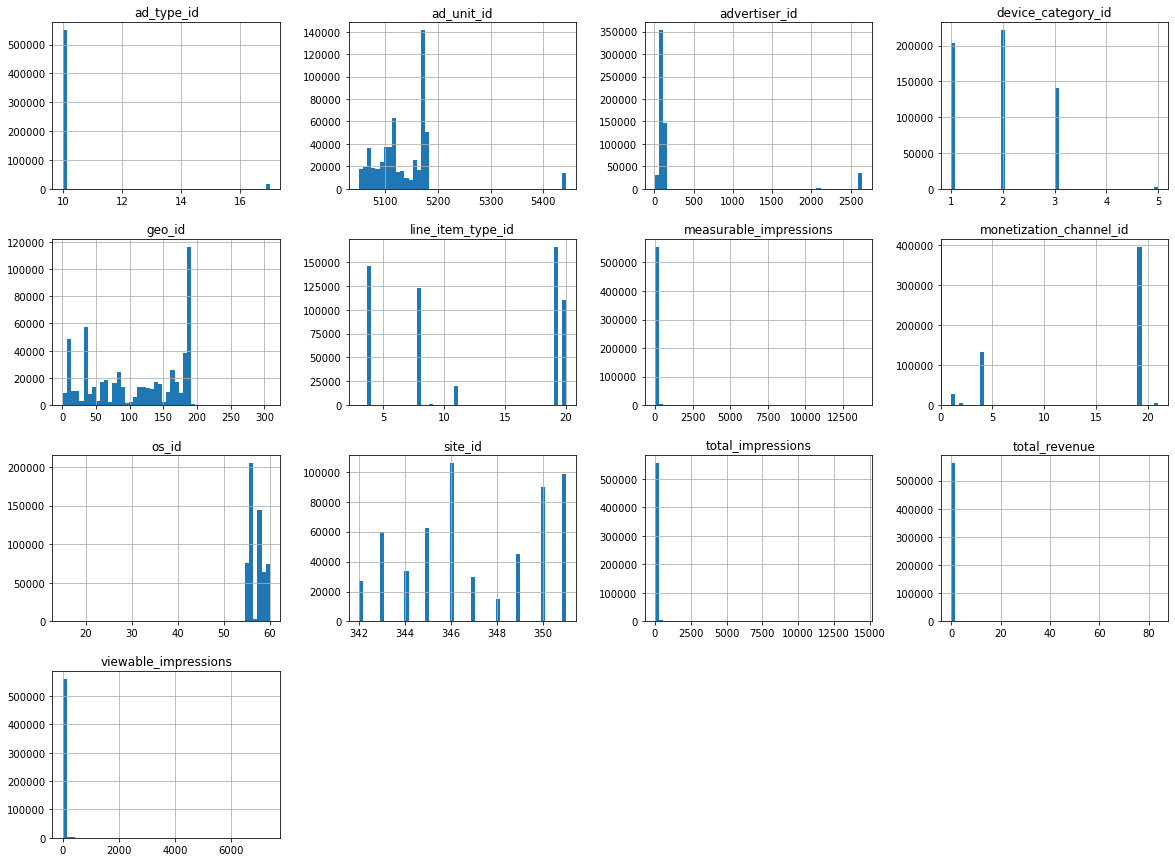

In [124]:
%matplotlib inline
data_clean.hist(bins=50, figsize = (20,15))
plt.show()

### Correlations


In [88]:
data_clean.corr()

,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,line_item_type_id,os_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions
site_id,1.000000,0.003941,0.007077,-0.028100,0.174138,-0.050023,-0.002319,0.056008,0.552180,0.014745,-0.003210,0.011999,0.016123
ad_type_id,0.003941,1.000000,-0.016773,-0.019436,0.012788,0.148062,0.011780,0.075799,0.258072,-0.002500,-0.006769,0.033266,-0.001670
geo_id,0.007077,-0.016773,1.000000,0.078437,-0.006751,0.056960,0.020154,-0.079580,-0.013075,0.121931,0.087258,0.098819,0.124266
device_category_id,-0.028100,-0.019436,0.078437,1.000000,-0.057253,-0.003907,0.212592,0.031085,0.012862,-0.025461,-0.030964,-0.029461,-0.025734
advertiser_id,0.174138,0.012788,-0.006751,-0.057253,1.000000,0.028907,-0.030532,-0.402578,0.078856,0.016861,-0.018701,0.015978,0.020050
line_item_type_id,-0.050023,0.148062,0.056960,-0.003907,0.028907,1.000000,-0.034744,-0.479746,-0.091472,0.046244,0.047066,0.041704,0.051250
os_id,-0.002319,0.011780,0.020154,0.212592,-0.030532,-0.034744,1.000000,0.052194,0.046708,0.030895,0.006672,0.013514,0.030845
monetization_channel_id,0.056008,0.075799,-0.079580,0.031085,-0.402578,-0.479746,0.052194,1.000000,0.121988,0.016150,0.033396,0.026922,0.012665
ad_unit_id,0.552180,0.258072,-0.013075,0.012862,0.078856,-0.091472,0.046708,0.121988,1.000000,-0.004833,-0.005789,0.002835,-0.004305
total_impressions,0.014745,-0.002500,0.121931,-0.025461,0.016861,0.046244,0.030895,0.016150,-0.004833,1.000000,0.730177,0.871118,0.994304


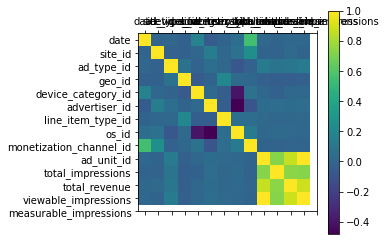

In [89]:
## as a plot
plt.matshow(data_clean.corr())
plt.xticks(range(len(data_clean.columns)), data_clean.columns)
plt.yticks(range(len(data_clean.columns)), data_clean.columns)
plt.figaspect(2.)
plt.colorbar()
plt.show()

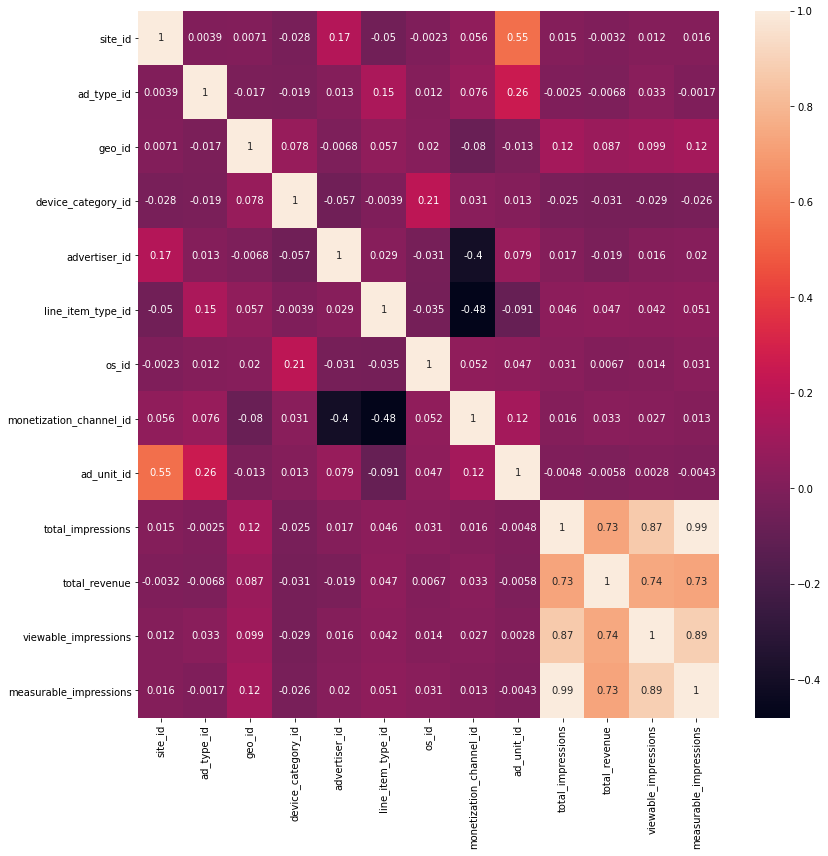

In [90]:
fig, ax = plt.subplots(figsize=(13, 13))
sb.heatmap(data_clean.corr(), annot=True)
plt.show()

- High corelation btw cols 
    - total_impressions	
    - total_revenue	
    - viewable_impressions	
    - measurable_impressions
    
- It is interesting to see that Revenue is highly correlated with impression KPIs but not the monetization channel, type of device etc. This may be due to impressions are device feature adjusted (assumption), i.e. impression on mobile is equivalent to impression on desktop 

**Dropping Columns based on Correlations**

- measurable_impressions: completely exaplined by total impressions


#### Current Understanding of the data:

- date  - 1 month data 1 jun 2019 - 30 jun 2019                    
- site_id   - 10 sites, not uniform 
- ad_type_id   - 2 ids, not uniform 
- geo_id         - 219 levels 
- device_category_id   - 5 levels    
- advertiser_id        - many levels
- order_id              - removed
- line_item_type_id        - 2 levels to stratify then remove
- os_id                    - 7 levels sort of uniform
- integration_type_id      - removed
- monetization_channel_id  - 4 levels to stratify
- ad_unit_id               - 132 levles
- total_impressions        - many levels
- total_revenue           - many levels 
- viewable_impressions     - high correlations with total impressions (remove or combine)
- measurable_impressions -  high correlations with total impressions (remove or combine)
- revenue_share_percent  - removed

**Feature Engineering/Combinations to explore**

- visibility = viewable_impressions/ total_impressions
- relation between site_id and geo_id (to see if any country contributes highly to particular site)
- relation between site_id and advertiser_id (to see the advertiser's prefernce)
- relation between advertiser_id and geo_id ( if the advertisers are targeting any particular country)
- date and day of the week :Since we only have one month we can extract date part of date and day of the week to check seasonality
- monetisation_id vs site_id: to see if any particular channel is more effective on particular kind of websites

**Other Modifications**

- LableEncoding of
    - ad_type_id
    - geo_id
    - device id
    - advertiser_id
    - os_is
    - line_item_type_id
    - monetization_channel_id
    - ad_unit_id
    - site_id


In [176]:
## Dropping measurable_impressions
data_clean.drop("measurable_impressions",axis = 1,inplace = True)

In [177]:
#target = data_clean['total_revenue']
#data_clean.drop("total_revenue",axis=1,inplace = True)

In [178]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['date','site_id', 'ad_type_id', 'geo_id', 'device_category_id','advertiser_id', 'line_item_type_id','os_id','monetization_channel_id', 'ad_unit_id']

for col in cat_cols:
    print (col)
    data_clean[col] = LabelEncoder().fit_transform(data_clean[col])

date
site_id
ad_type_id
geo_id
device_category_id
advertiser_id
line_item_type_id
os_id
monetization_channel_id
ad_unit_id


In [179]:
## New column visibility 
data_clean["visibility"] = round(((data_clean["viewable_impressions"]/data_clean["total_impressions"])*100).fillna(0),2)
data = data.replace([np.inf, -np.inf], 0)
## Dropping viewable_impressions
data_clean.drop("viewable_impressions",axis = 1,inplace = True)

In [180]:
data_clean.visibility.head(5)

0    12.5
1     0.0
2     0.0
3     0.0
4     0.0
Name: visibility, dtype: float64

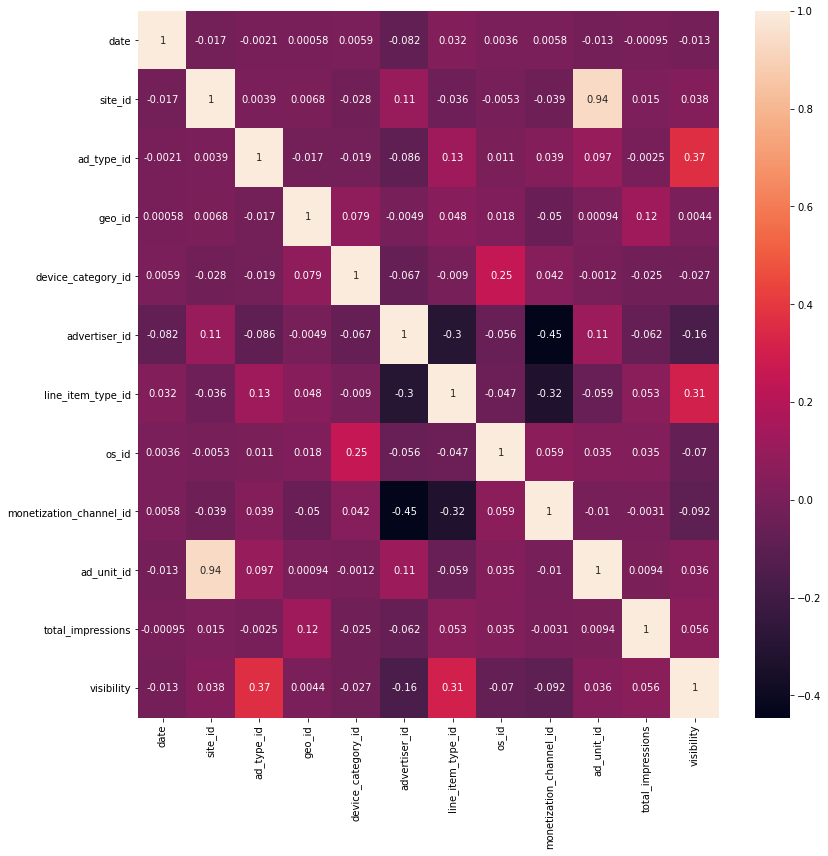

In [181]:
fig, ax = plt.subplots(figsize=(13, 13))
sb.heatmap(data_clean.corr(), annot=True)
plt.show()

In [185]:
## removing ad_unit_id high correlations with site id
data_clean.drop("ad_unit_id",axis = 1,inplace = True)

In [188]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567290 entries, 0 to 567289
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     567290 non-null  int64  
 1   site_id                  567290 non-null  int64  
 2   ad_type_id               567290 non-null  int64  
 3   geo_id                   567290 non-null  int64  
 4   device_category_id       567290 non-null  int64  
 5   advertiser_id            567290 non-null  int64  
 6   line_item_type_id        567290 non-null  int64  
 7   os_id                    567290 non-null  int64  
 8   monetization_channel_id  567290 non-null  int64  
 9   total_impressions        567290 non-null  int64  
 10  total_revenue            567290 non-null  float64
 11  visibility               567290 non-null  float64
dtypes: float64(2), int64(10)
memory usage: 51.9 MB


## Outlier Treatment

date


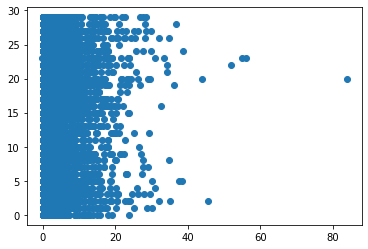

site_id


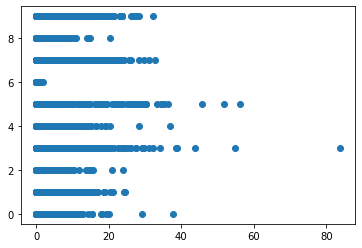

ad_type_id


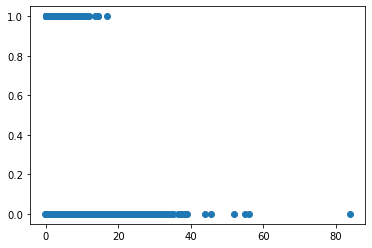

geo_id


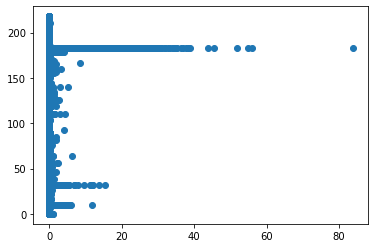

device_category_id


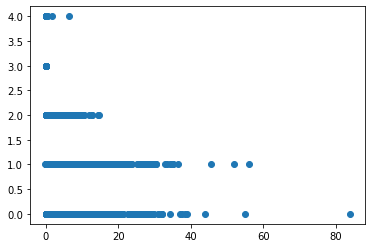

advertiser_id


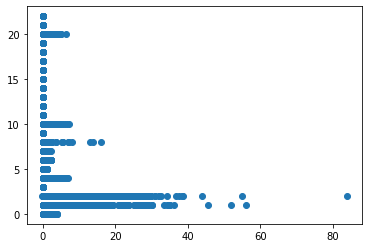

line_item_type_id


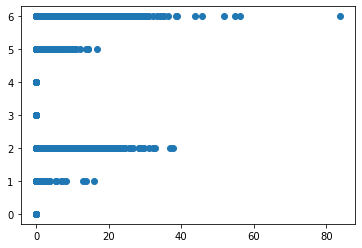

os_id


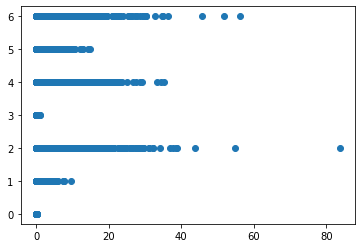

monetization_channel_id


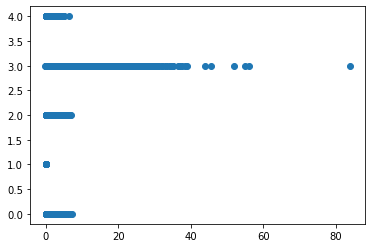

ad_unit_id


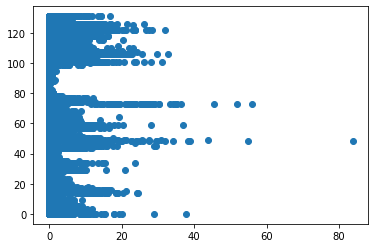

total_impressions


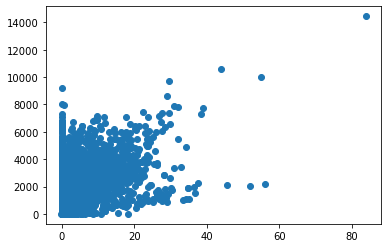

visibility


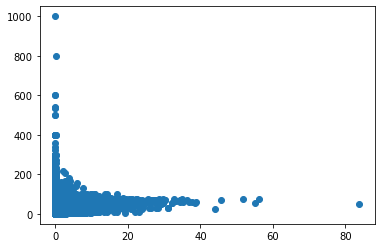

In [147]:
cols = ['date', 'site_id', 'ad_type_id', 'geo_id', 'device_category_id',
       'advertiser_id', 'line_item_type_id', 'os_id',
       'monetization_channel_id', 'ad_unit_id', 'total_impressions',
        'visibility']

for col in cols:
    print(col)
    plt.scatter(data_clean['total_revenue'],data_clean[col])
    plt.show()

date


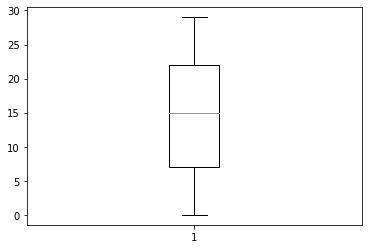

site_id


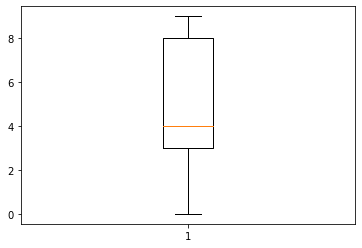

ad_type_id


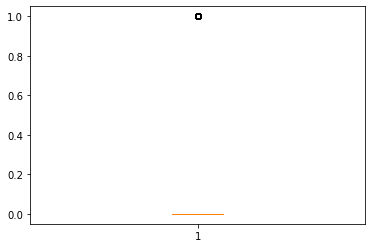

geo_id


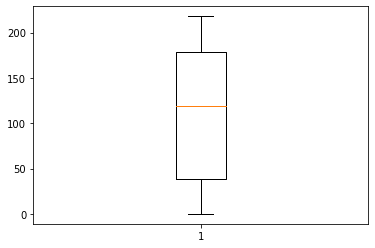

device_category_id


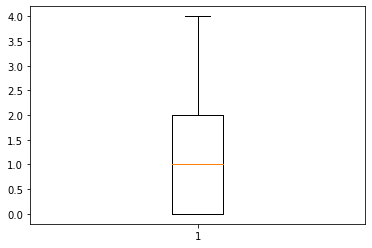

advertiser_id


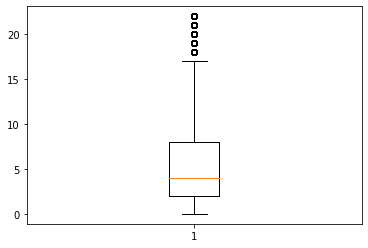

line_item_type_id


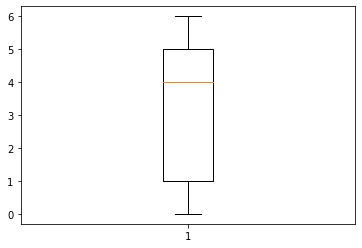

os_id


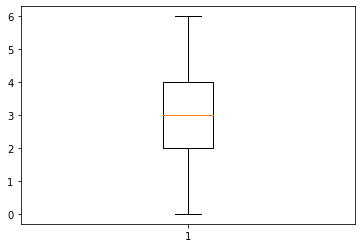

monetization_channel_id


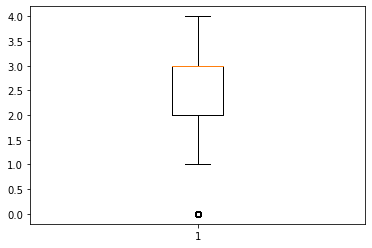

ad_unit_id


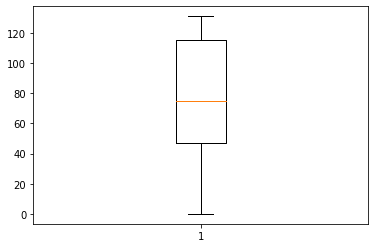

total_impressions


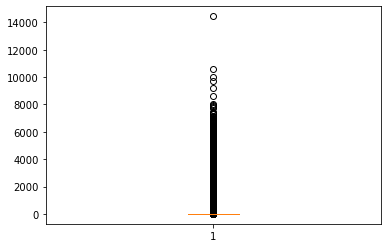

total_revenue


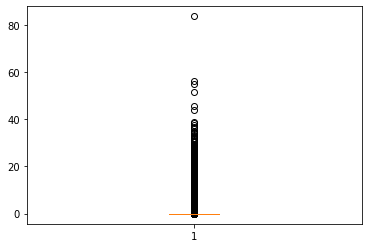

visibility


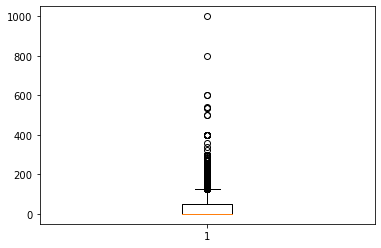

In [150]:
## Some outliers present confirming with boxplot
for col in data_clean.columns:
    print(col)
    plt.boxplot(data_clean[col])
    plt.show()

In [169]:
## 1 outlier
data_clean[data_clean['total_revenue'] >= 60]

,date,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,line_item_type_id,os_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,visibility
186999,20,3,0,183,0,2,6,2,3,48,14452,83.822,51.15


In [170]:
## removign the outlier

data_clean = data_clean[data_clean['total_revenue'] < 60]

In [195]:
data_clean.to_csv("../datasets/DataScientist_L2/Ascendeum_Dataset_clean.csv",index= False)